In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import glob

In [3]:
glob.glob(r'D:\stock_price analysis\individual_stocks_5yr/*csv')

['D:\\stock_price analysis\\individual_stocks_5yr\\AAL_data.csv',
 'D:\\stock_price analysis\\individual_stocks_5yr\\AAPL_data.csv',
 'D:\\stock_price analysis\\individual_stocks_5yr\\AAP_data.csv',
 'D:\\stock_price analysis\\individual_stocks_5yr\\ABBV_data.csv',
 'D:\\stock_price analysis\\individual_stocks_5yr\\ABC_data.csv',
 'D:\\stock_price analysis\\individual_stocks_5yr\\ABT_data.csv',
 'D:\\stock_price analysis\\individual_stocks_5yr\\ACN_data.csv',
 'D:\\stock_price analysis\\individual_stocks_5yr\\ADBE_data.csv',
 'D:\\stock_price analysis\\individual_stocks_5yr\\ADI_data.csv',
 'D:\\stock_price analysis\\individual_stocks_5yr\\ADM_data.csv',
 'D:\\stock_price analysis\\individual_stocks_5yr\\ADP_data.csv',
 'D:\\stock_price analysis\\individual_stocks_5yr\\ADSK_data.csv',
 'D:\\stock_price analysis\\individual_stocks_5yr\\ADS_data.csv',
 'D:\\stock_price analysis\\individual_stocks_5yr\\AEE_data.csv',
 'D:\\stock_price analysis\\individual_stocks_5yr\\AEP_data.csv',
 'D:\\

In [4]:
len(glob.glob(r'D:\stock_price analysis\individual_stocks_5yr/*csv'))

505

In [5]:
company_list = [ 
    r'D:\\stock_price analysis\\individual_stocks_5yr\\AAPL_data.csv',
    r'D:\\stock_price analysis\\individual_stocks_5yr\\AMZN_data.csv',
    r'D:\\stock_price analysis\\individual_stocks_5yr\\GOOGL_data.csv',
    r'D:\\stock_price analysis\\individual_stocks_5yr\\MSFT_data.csv',
    
]

In [6]:
all_data = pd.DataFrame()

for file in company_list:
    current_df = pd.read_csv(file)
    all_data = pd.concat([all_data , current_df], ignore_index = True)

In [7]:
all_data.shape

(5036, 7)

In [8]:
all_data.head(5)

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [10]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [13]:
all_data['date'] = pd.to_datetime(all_data['date'])

In [14]:
all_data['date']

0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
5031   2018-02-01
5032   2018-02-02
5033   2018-02-05
5034   2018-02-06
5035   2018-02-07
Name: date, Length: 5036, dtype: datetime64[ns]

In [15]:
tech_list = all_data['Name'].unique()

In [16]:
tech_list

array(['AAPL', 'AMZN', 'GOOGL', 'MSFT'], dtype=object)

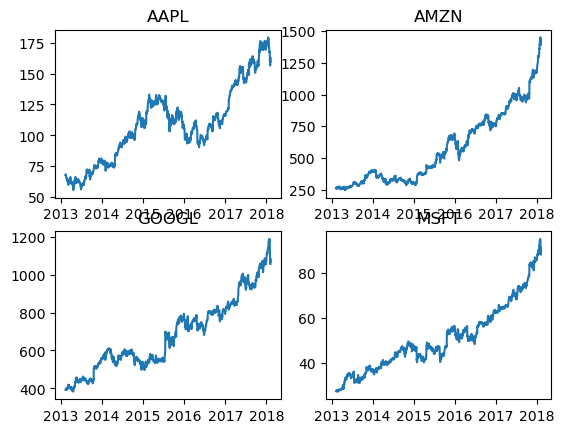

In [18]:
for index, company in enumerate(tech_list, 1):
    plt.subplot(2,2,index)
    filter1 = all_data['Name'] == company
    df = all_data[filter1]
    plt.plot(df['date'],df['close'])
    plt.title(company)

In [19]:
new_data = all_data.copy()

In [23]:
ma_day = [10,20,50]

for ma in ma_day:
    new_data['close_'+str(ma) ] = new_data['close'].rolling(ma).mean()

In [24]:
new_data

date     open     high      low    close     volume  Name  \
0    2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1    2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2    2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3    2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
4    2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   
...         ...      ...      ...      ...      ...        ...   ...   
5031 2018-02-01  94.7900  96.0700  93.5813  94.2600   47227882  MSFT   
5032 2018-02-02  93.6400  93.9700  91.5000  91.7800   47867753  MSFT   
5033 2018-02-05  90.5600  93.2400  88.0000  88.0000   51031465  MSFT   
5034 2018-02-06  86.8900  91.4750  85.2500  91.3300   67998564  MSFT   
5035 2018-02-07  90.4900  91.7700  89.2000  89.6100   41107592  MSFT   

      close_10  close_20  close_50  
0          NaN       NaN       NaN  
1          NaN       NaN       NaN  
2          NaN       NaN       NaN  
3          NaN       NaN       NaN  
4          NaN       NaN       NaN  
...        ...       ...       ...  
5031    92.765   90.6770   86.9978  
5032    92.943   90.9105   87.1828  
5033    92.582   90.9010   87.2684  
5034    92.525   91.0535   87.4328  
5035    92.304   91.1230   87.5598  

[5036 rows x 10 columns]

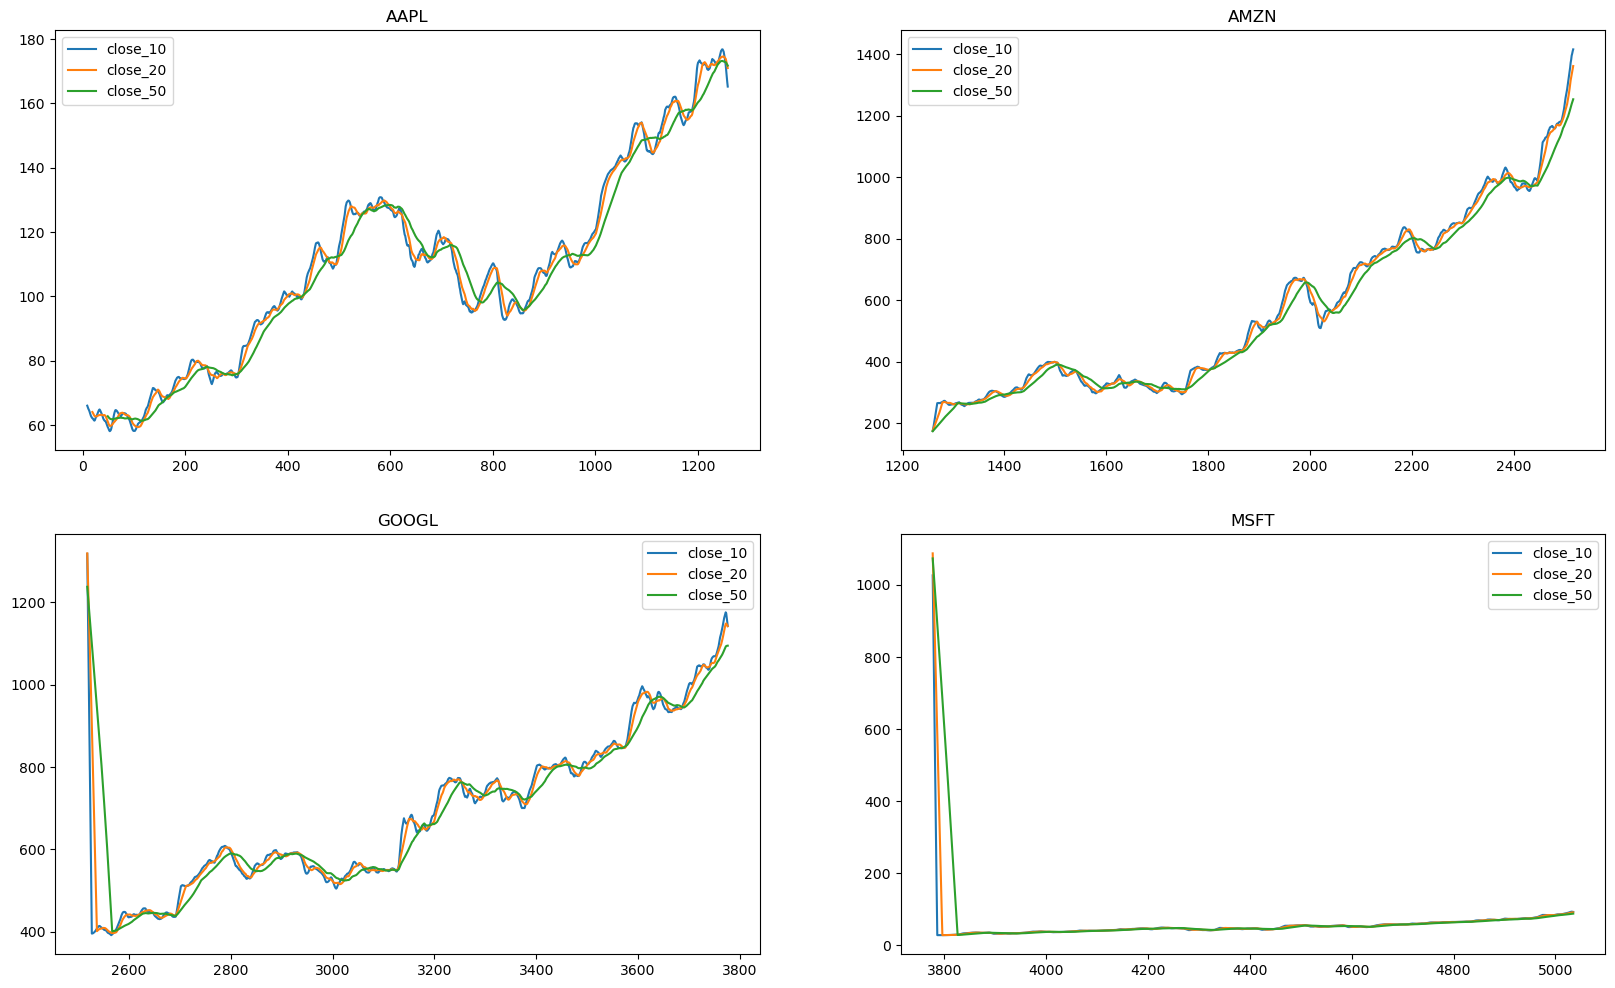

In [27]:
plt.figure(figsize = (20,12))

for index, company in enumerate(tech_list, 1):
    plt.subplot(2,2,index)
    filter1 = new_data['Name'] == company
    df = new_data[filter1]
    df[['close_10','close_20','close_50']].plot(ax=plt.gca())
    plt.title(company)

In [28]:
company_list

['D:\\\\stock_price analysis\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'D:\\\\stock_price analysis\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'D:\\\\stock_price analysis\\\\individual_stocks_5yr\\\\GOOGL_data.csv',
 'D:\\\\stock_price analysis\\\\individual_stocks_5yr\\\\MSFT_data.csv']

In [29]:
apple = pd.read_csv(r'D:\\\\stock_price analysis\\\\individual_stocks_5yr\\\\AAPL_data.csv')

In [30]:
apple.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [31]:
apple['close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: close, Length: 1259, dtype: float64

In [32]:
apple['daily_return in %'] = apple['close'].pct_change()*100

In [33]:
apple['daily_return in %']

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: daily_return in %, Length: 1259, dtype: float64

In [34]:
apple.head()

date     open     high      low    close     volume  Name  \
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

   daily_return in %  
0                NaN  
1           1.042235  
2          -2.506658  
3          -0.190297  
4          -0.089934

In [35]:
import plotly.express as px

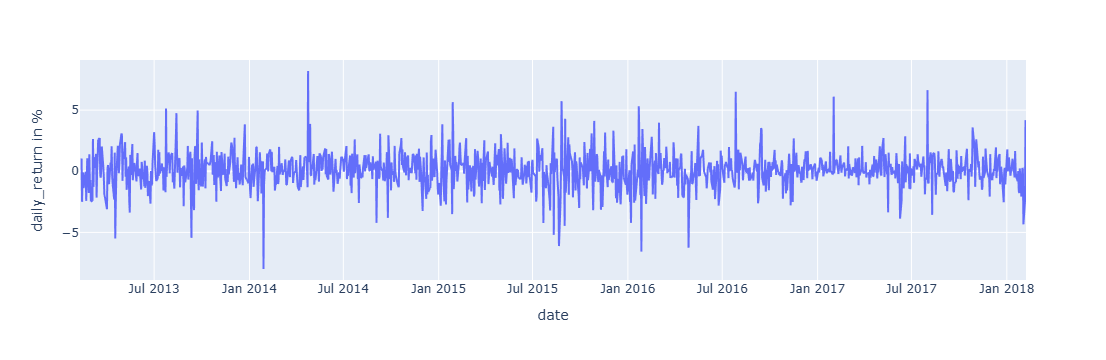

In [37]:
px.line(apple, x="date",y="daily_return in %")

In [39]:
apple['date'] = pd.to_datetime(apple['date'])

In [40]:
apple.set_index('date' , inplace = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_11724\3929892990.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



<Axes: xlabel='date'>

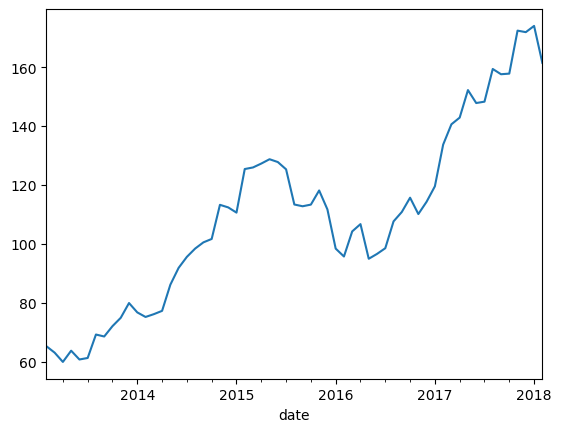

In [42]:
apple['close'].resample('M').mean().plot()

C:\Users\DELL\AppData\Local\Temp\ipykernel_11724\522943284.py:1: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



<Axes: xlabel='date'>

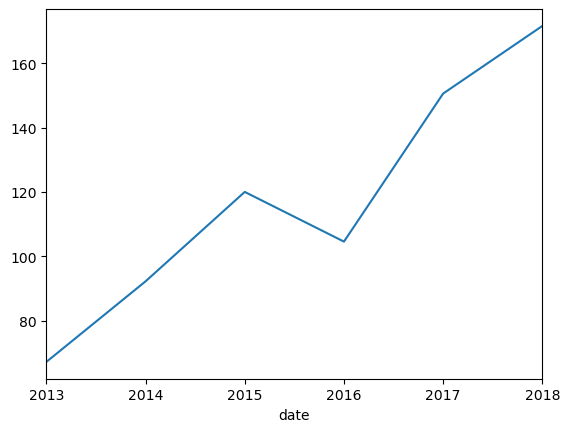

In [43]:
apple['close'].resample('Y').mean().plot()

C:\Users\DELL\AppData\Local\Temp\ipykernel_11724\3783177441.py:1: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.



<Axes: xlabel='date'>

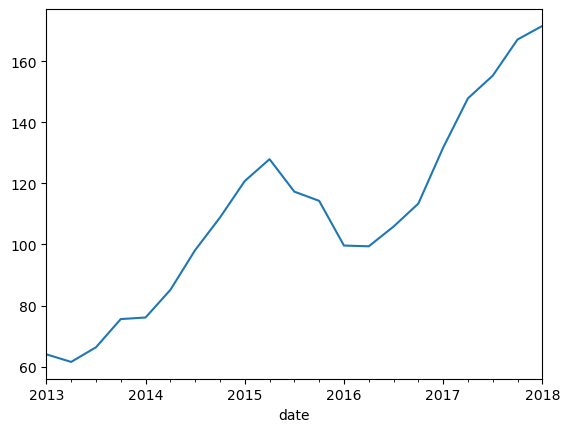

In [44]:
apple['close'].resample('Q').mean().plot()

In [57]:
company_list[0]

'D:\\\\stock_price analysis\\\\individual_stocks_5yr\\\\AAPL_data.csv'

In [58]:
app = pd.read_csv(company_list[0])
amx = pd.read_csv(company_list[1])
goo = pd.read_csv(company_list[2])
mft = pd.read_csv(company_list[3])

In [59]:
closing_price = pd.DataFrame()

In [60]:
closing_price['apple_close'] = app['close']
closing_price['amazon_close'] = amx['close'] 
closing_price['google_close'] = goo['close'] 
closing_price['mfst_close'] = mft['close'] 

In [61]:
closing_price

apple_close  amazon_close  google_close  mfst_close
0         67.8542        261.95      393.0777       27.55
1         68.5614        257.21      391.6012       27.86
2         66.8428        258.70      390.7403       27.88
3         66.7156        269.47      391.8214       28.03
4         66.6556        269.24      394.3039       28.04
...           ...           ...           ...         ...
1254     167.7800       1390.00     1181.5900       94.26
1255     160.5000       1429.95     1119.2000       91.78
1256     156.4900       1390.00     1062.3900       88.00
1257     163.0300       1442.84     1084.4300       91.33
1258     159.5400       1416.78     1055.4100       89.61

[1259 rows x 4 columns]

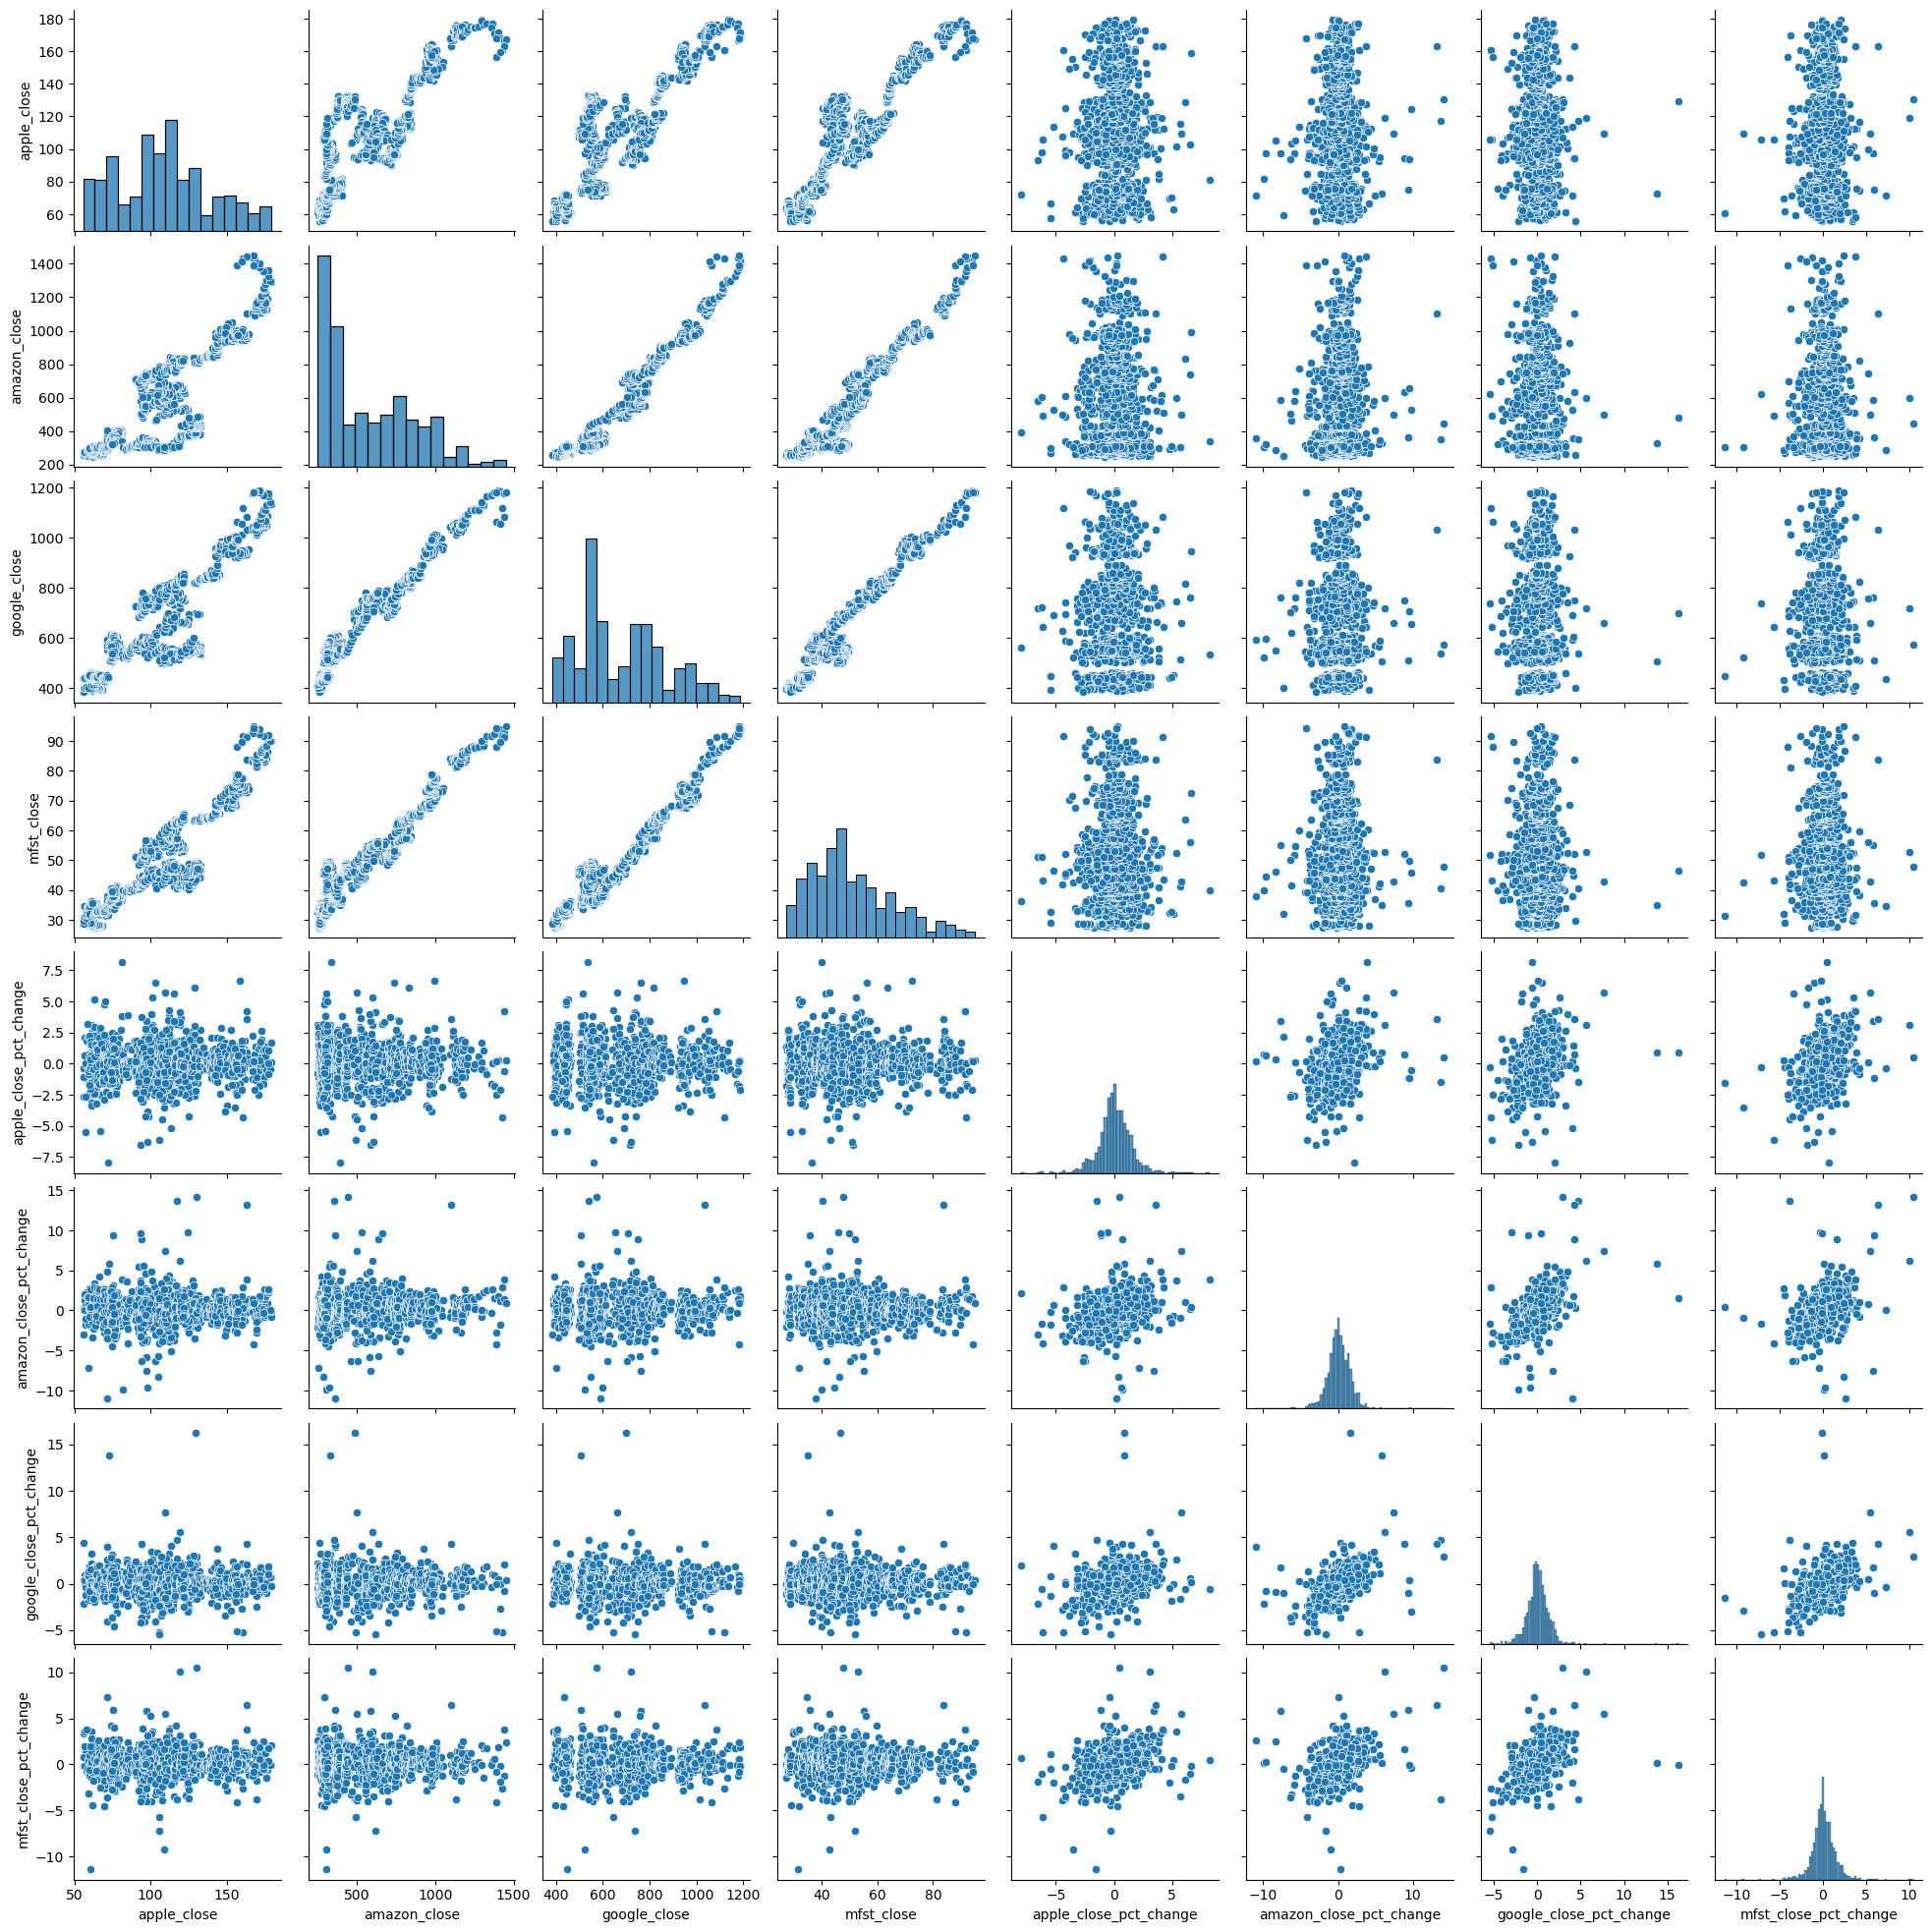

In [76]:
sns.pairplot(closing_price)

In [66]:
for col in closing_price.columns:
   closing_price[col + '_pct_change'] =  (closing_price[col]- closing_price[col].shift(1)) / closing_price[col].shift(1)*100

In [67]:
closing_price.columns

Index(['apple_close', 'amazon_close', 'google_close', 'mfst_close',
       'apple_close_pct_change', 'amazon_close_pct_change',
       'google_close_pct_change', 'mfst_close_pct_change'],
      dtype='object')

In [68]:
closing_price

apple_close  amazon_close  google_close  mfst_close  \
0         67.8542        261.95      393.0777       27.55   
1         68.5614        257.21      391.6012       27.86   
2         66.8428        258.70      390.7403       27.88   
3         66.7156        269.47      391.8214       28.03   
4         66.6556        269.24      394.3039       28.04   
...           ...           ...           ...         ...   
1254     167.7800       1390.00     1181.5900       94.26   
1255     160.5000       1429.95     1119.2000       91.78   
1256     156.4900       1390.00     1062.3900       88.00   
1257     163.0300       1442.84     1084.4300       91.33   
1258     159.5400       1416.78     1055.4100       89.61   

      apple_close_pct_change  amazon_close_pct_change  \
0                        NaN                      NaN   
1                   1.042235                -1.809506   
2                  -2.506658                 0.579293   
3                  -0.190297                 4.163123   
4                  -0.089934                -0.085353   
...                      ...                      ...   
1254                0.209043                -4.196734   
1255               -4.339015                 2.874101   
1256               -2.498442                -2.793804   
1257                4.179181                 3.801439   
1258               -2.140710                -1.806160   

      google_close_pct_change  mfst_close_pct_change  
0                         NaN                    NaN  
1                   -0.375625               1.125227  
2                   -0.219841               0.071788  
3                    0.276680               0.538020  
4                    0.633579               0.035676  
...                       ...                    ...  
1254                -0.053290              -0.789391  
1255                -5.280173              -2.631021  
1256                -5.075947              -4.118544  
1257                 2.074568               3.784091  
1258                -2.676060              -1.883280  

[1259 rows x 8 columns]

In [72]:
clsing_p = closing_price[['apple_close_pct_change', 'amazon_close_pct_change',
       'google_close_pct_change', 'mfst_close_pct_change']]

In [73]:
clsing_p

apple_close_pct_change  amazon_close_pct_change  \
0                        NaN                      NaN   
1                   1.042235                -1.809506   
2                  -2.506658                 0.579293   
3                  -0.190297                 4.163123   
4                  -0.089934                -0.085353   
...                      ...                      ...   
1254                0.209043                -4.196734   
1255               -4.339015                 2.874101   
1256               -2.498442                -2.793804   
1257                4.179181                 3.801439   
1258               -2.140710                -1.806160   

      google_close_pct_change  mfst_close_pct_change  
0                         NaN                    NaN  
1                   -0.375625               1.125227  
2                   -0.219841               0.071788  
3                    0.276680               0.538020  
4                    0.633579               0.035676  
...                       ...                    ...  
1254                -0.053290              -0.789391  
1255                -5.280173              -2.631021  
1256                -5.075947              -4.118544  
1257                 2.074568               3.784091  
1258                -2.676060              -1.883280  

[1259 rows x 4 columns]

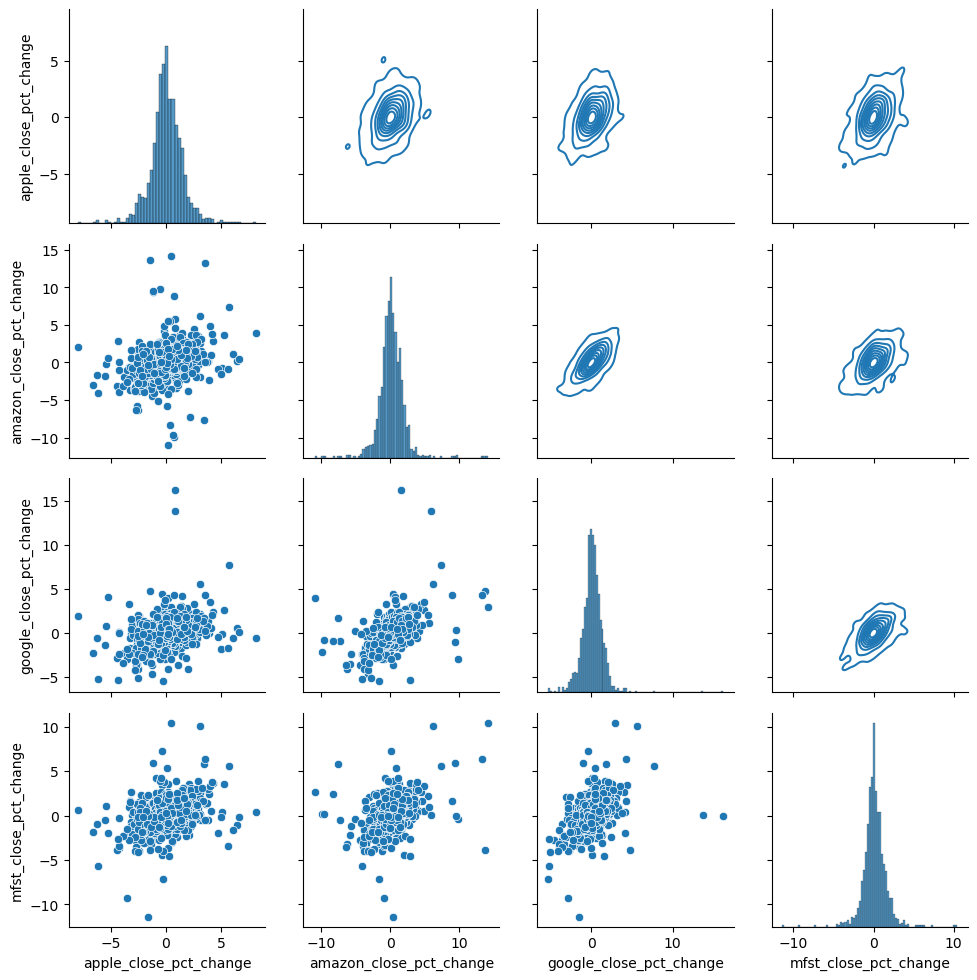

In [78]:
g = sns.PairGrid(data = clsing_p)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [79]:
clsing_p.corr()

apple_close_pct_change  amazon_close_pct_change  \
apple_close_pct_change                 1.000000                 0.287659   
amazon_close_pct_change                0.287659                 1.000000   
google_close_pct_change                0.348858                 0.548423   
mfst_close_pct_change                  0.366598                 0.402678   

                         google_close_pct_change  mfst_close_pct_change  
apple_close_pct_change                  0.348858               0.366598  
amazon_close_pct_change                 0.548423               0.402678  
google_close_pct_change                 1.000000               0.488373  
mfst_close_pct_change                   0.488373               1.000000